# Batch Inference

In [1]:
from os import listdir
from os.path import join
import xarray as xr
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import markplotlib

In [3]:
resdir = join("..", "model-results", "competition-regressions")
fns = listdir(resdir)
posteriors = []
titles = []
for fn in fns:
    year, comp = fn.replace(".nc", "").split("_")
    year = int(year)
    comp = comp.title()
    titles.append(f"{comp} {year}")
    posteriors.append(xr.load_dataset(join(resdir, fn)))

In [4]:
idx = np.argsort(titles)
titles = [titles[i] for i in idx]
posteriors = [posteriors[i] for i in idx]

In [5]:
idx_open = titles.index("Open 2011")
titles[idx_open:]

['Open 2011',
 'Open 2012',
 'Open 2013',
 'Open 2014',
 'Open 2015',
 'Open 2016',
 'Open 2017',
 'Open 2018',
 'Open 2019',
 'Open 2020',
 'Open 2021',
 'Open 2022',
 'Open 2023',
 'Open 2024']

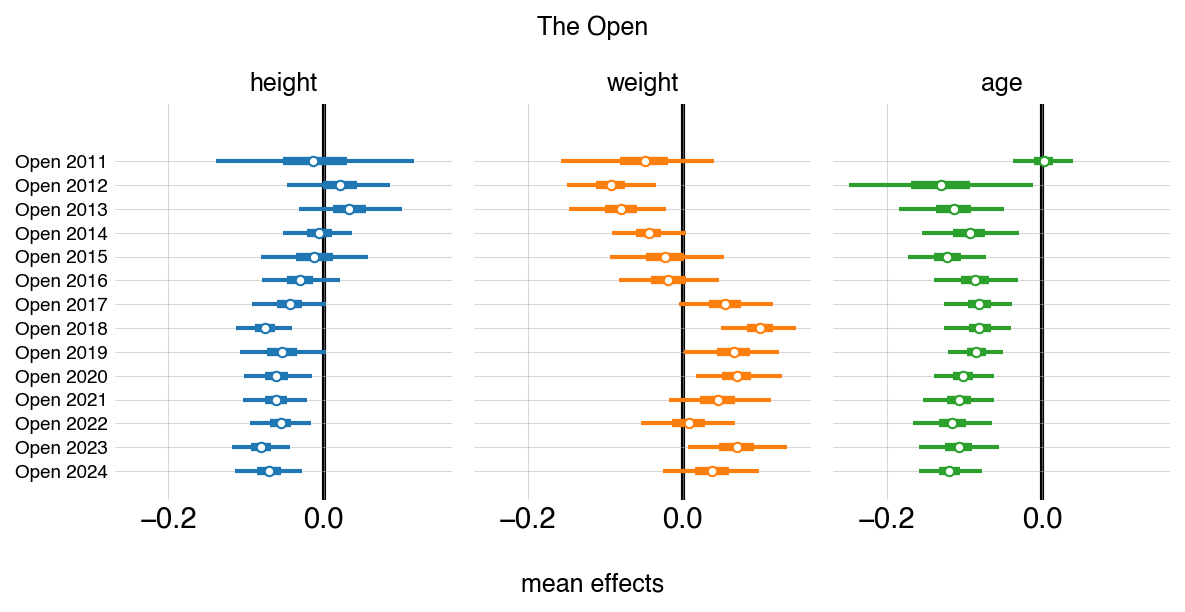

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
for i in range(3):
    az.plot_forest(
        [p["mu"][:, :, i] for p in posteriors[idx_open:]],
        colors=f"C{i}",
        combined=True,
        legend=False,
        ax=axs[i],
    )
    axs[i].axvline(0, color="k", zorder=-1)
    axs[i].grid(True)
axs[0].set_yticklabels(titles[idx_open:][::-1], fontsize=9)
axs[0].set_title("height")
axs[1].set_title("weight")
axs[2].set_title("age")
fig.supxlabel("mean effects")
fig.suptitle("The Open")
fig.tight_layout()
fig.savefig("../plots/effects/batch_open_mean_effects.png")

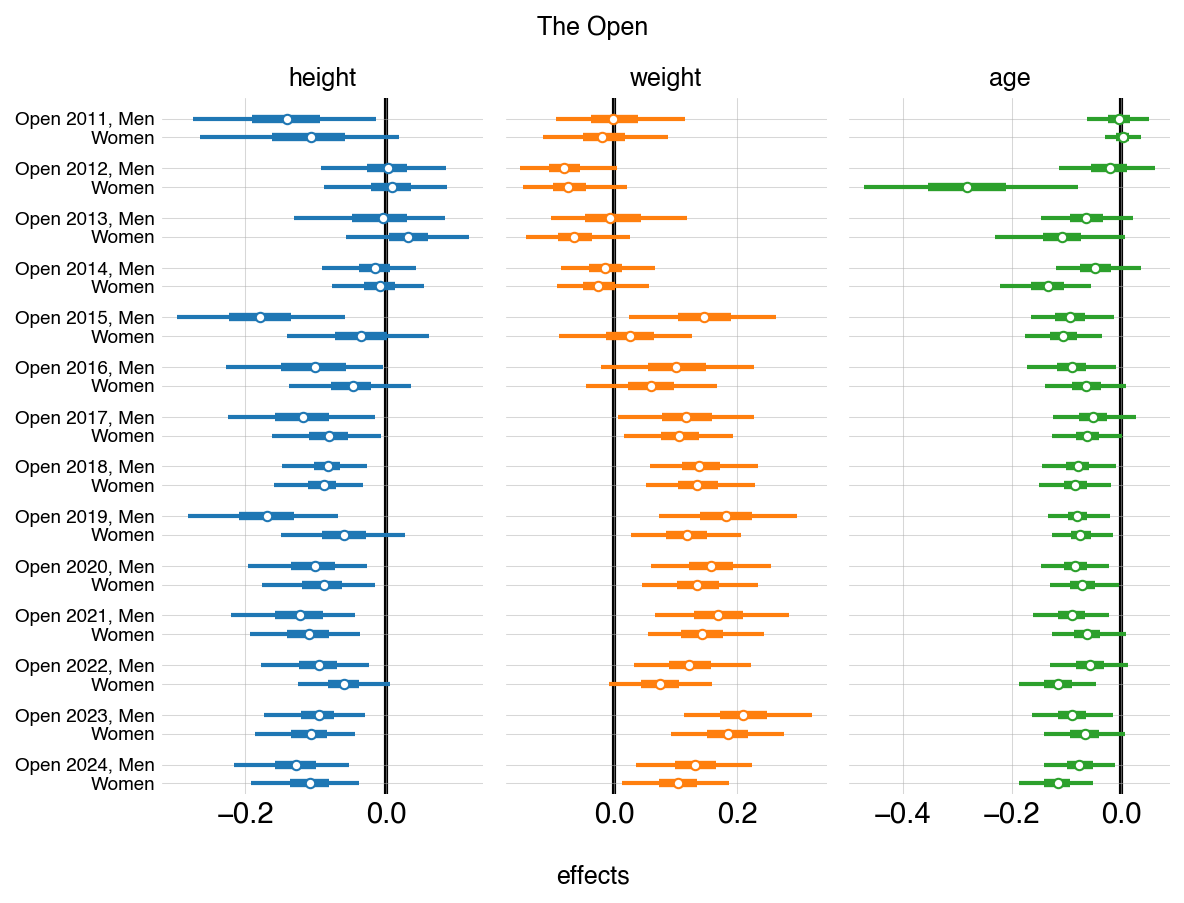

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(8, 6), sharex=False, sharey=True)
for i in range(3):
    az.plot_forest(
        {
            titles[j]: posteriors[j]["B"][:, :, :2, i]
            for j in range(idx_open, len(posteriors))
        },
        colors=f"C{i}",
        combined=True,
        legend=False,
        ax=axs[i],
    )
yticklabels = []
for year in range(2024, 2010, -1):
    yticklabels.append("Women")
    yticklabels.append(f"Open {year}, Men")
axs[0].set_yticklabels(yticklabels, fontsize=9)
for ax in axs:
    ax.axvline(0, color="k", zorder=-1)
    ax.grid(True)
axs[0].set_title("height")
axs[1].set_title("weight")
axs[2].set_title("age")
fig.supxlabel("effects")
fig.suptitle("The Open")
fig.tight_layout()
fig.savefig("../plots/effects/batch_open_main_divisions.png")

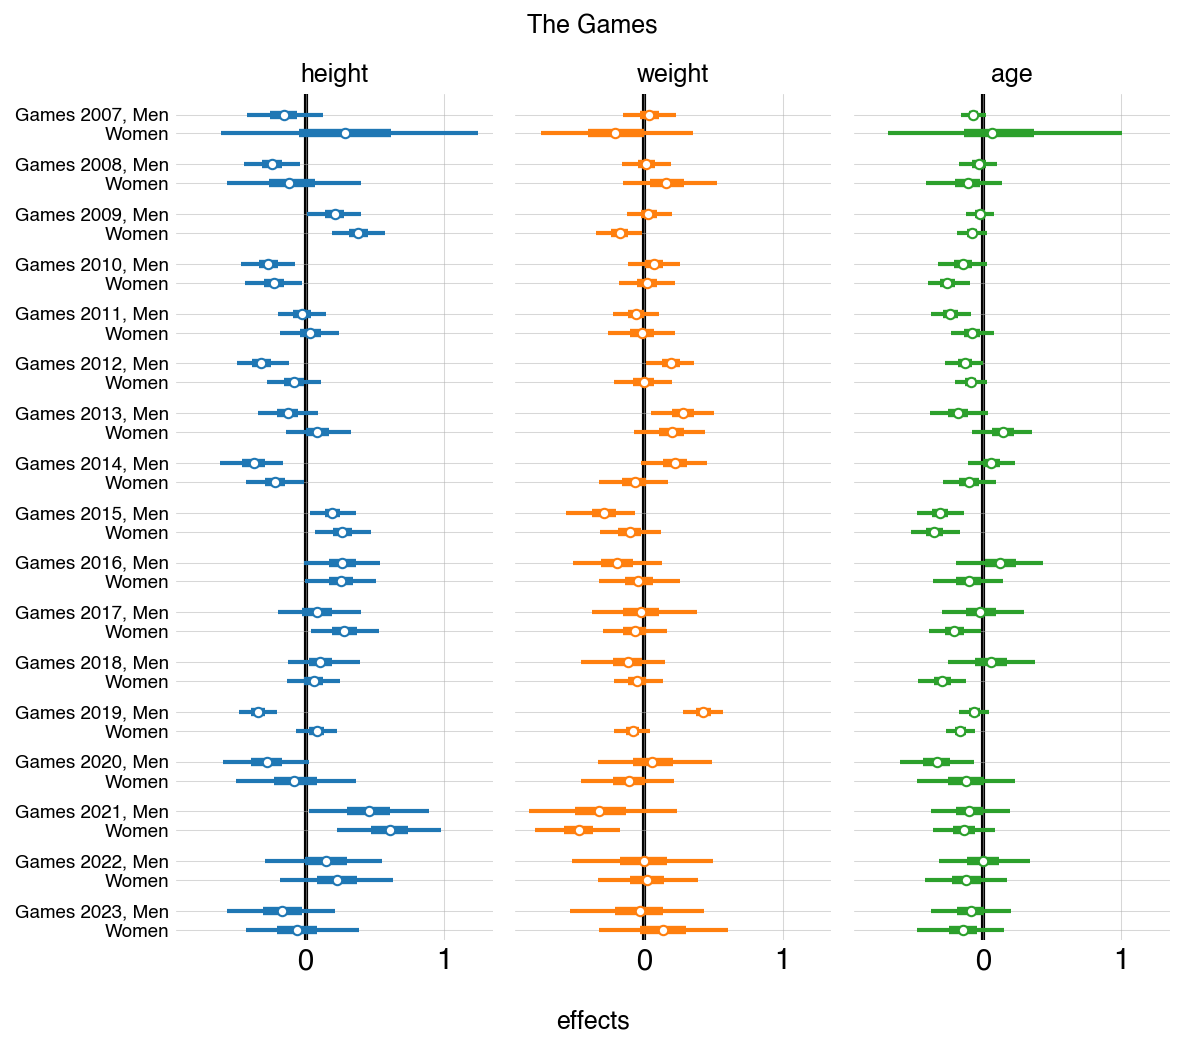

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(8, 7), sharex=True, sharey=True)
for i in range(3):
    az.plot_forest(
        {titles[j]: posteriors[j]["B"][:, :, :, i] for j in range(idx_open)},
        colors=f"C{i}",
        combined=True,
        legend=False,
        ax=axs[i],
    )
yticklabels = []
for year in range(2023, 2006, -1):
    yticklabels.append("Women")
    yticklabels.append(f"Games {year}, Men")
axs[0].set_yticklabels(yticklabels, fontsize=9)
for ax in axs:
    ax.axvline(0, color="k", zorder=-1)
    ax.grid(True)
axs[0].set_title("height")
axs[1].set_title("weight")
axs[2].set_title("age")
fig.supxlabel("effects")
fig.suptitle("The Games")
fig.tight_layout()
fig.savefig("../plots/effects/batch_games_main_divisions.png")